In [1]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: mount failed

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import scipy.io as sio
np.random.seed(7)

In [ ]:
Data=sio.loadmat('/content/drive/MyDrive/datasets/Botswana.mat')['Botswana']
Label=sio.loadmat('/content/drive/MyDrive/datasets/Botswana_gt.mat')['Botswana_gt']

Data=np.reshape(Data,(Data.shape[0]*Data.shape[1],Data.shape[2]))

Label=np.reshape(Label,(Label.shape[0]*Label.shape[1]))

Labels,counts=np.unique(Label,return_counts=True)

Data=Data[Label>0,:]
Label=Label[Label>0]

Labels,counts=np.unique(Label,return_counts=True)


Labels,counts=np.unique(Label,return_counts=True)

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(Data)
Data= scaler.transform(Data)

In [ ]:
from sklearn.model_selection import train_test_split

testRatio=0.20

X_train, X_test, y_train, y_test = train_test_split(Data, Label, test_size=testRatio, random_state=345,
                                                        stratify=Label)

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train= scaler.transform(X_train)
X_test=scaler.transform(X_test)

30


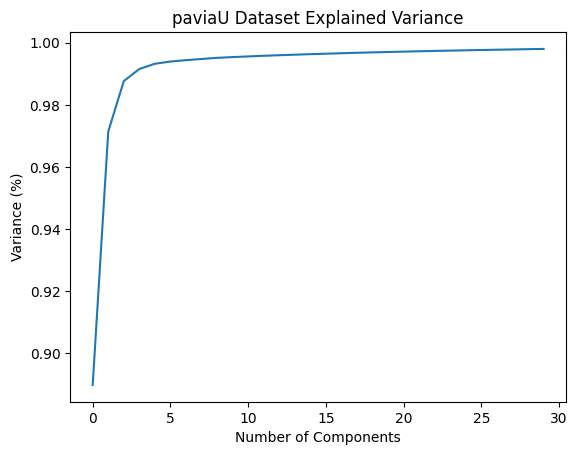

In [ ]:
import matplotlib.pyplot as plt
pca = PCA(n_components=30)
pca.fit_transform(X_train)
newspace=pca.components_
newspace=newspace.transpose()
X_train=np.matmul(X_train,newspace)
print(pca.n_components_)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('paviaU Dataset Explained Variance')
plt.show()
X_test=np.matmul(X_test,newspace)

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics
import numpy as np

classifiers = []
Train_acc = []
Valid_acc = []
accuracy = -1
accuracy_train = -1

# Adjusted range for C and gamma
for C in np.arange(1, 102, 50):  # Increased step size for C
    for gamma in np.arange(0.001, 0.1, 0.02):  # Increased step size for gamma

        clf = SVC(C=C, gamma=gamma)
        print("----------------------------------------------------------------")
        clf.fit(X_train, y_train)
        classifiers.append((C, gamma, clf))
        y_pred = clf.predict(X_train)
        acc_train = metrics.accuracy_score(y_train, y_pred)
        Train_acc.append(acc_train)
        y_pred = clf.predict(X_test)
        acc = metrics.accuracy_score(y_test, y_pred)
        Valid_acc.append(acc)

        if acc_train > accuracy_train:
            accuracy_train = acc_train
            best_c_train = C
            best_g_train = gamma
        print(f"C_train= {C} Best C_train = {best_c_train} gamma_train = {gamma} best_gamma_train = {best_g_train} Accuracy_train = {acc_train} Best Accuracy_train = {accuracy_train}\n")

        if acc > accuracy:
            accuracy = acc
            best_c = C
            best_g = gamma
        print(f"C= {C} Best C = {best_c} gamma = {gamma} best_gamma = {best_g} Accuracy = {acc} Best Accuracy = {accuracy}\n")


----------------------------------------------------------------
C_train= 1 Best C_train = 1 gamma_train = 0.001 best_gamma_train = 0.001 Accuracy_train = 0.8548883756735951 Best Accuracy_train = 0.8548883756735951

C= 1 Best C = 1 gamma = 0.001 best_gamma = 0.001 Accuracy = 0.8630769230769231 Best Accuracy = 0.8630769230769231

----------------------------------------------------------------
C_train= 1 Best C_train = 1 gamma_train = 0.021 best_gamma_train = 0.021 Accuracy_train = 0.9295612009237876 Best Accuracy_train = 0.9295612009237876

C= 1 Best C = 1 gamma = 0.021 best_gamma = 0.021 Accuracy = 0.9353846153846154 Best Accuracy = 0.9353846153846154

----------------------------------------------------------------
C_train= 1 Best C_train = 1 gamma_train = 0.041 best_gamma_train = 0.041 Accuracy_train = 0.939183987682833 Best Accuracy_train = 0.939183987682833

C= 1 Best C = 1 gamma = 0.041 best_gamma = 0.041 Accuracy = 0.943076923076923 Best Accuracy = 0.943076923076923

-----------

In [ ]:
import pandas as pd
clf = SVC(C=51,gamma=0.006,decision_function_shape='ovo')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn import metrics
print("Accuracy :",metrics.accuracy_score(y_pred, y_test)*100)
from sklearn.metrics import cohen_kappa_score
print("Cohen Kappa Score :",cohen_kappa_score(y_pred, y_test)*100)
from sklearn.metrics import confusion_matrix,classification_report
mat = confusion_matrix(y_pred, y_test)
pd.DataFrame(mat)
# print(confusion_matrix(y_test, y_pred ))
print(classification_report(y_test, y_pred ))


Accuracy : 96.0
Cohen Kappa Score : 95.66663333307692
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        54
           2       0.95      1.00      0.98        20
           3       0.96      0.98      0.97        50
           4       0.96      1.00      0.98        43
           5       0.91      0.91      0.91        54
           6       0.87      0.85      0.86        54
           7       1.00      0.98      0.99        52
           8       1.00      1.00      1.00        40
           9       0.94      0.94      0.94        63
          10       0.96      0.94      0.95        50
          11       0.98      0.97      0.98        61
          12       0.97      0.97      0.97        36
          13       0.98      0.98      0.98        54
          14       1.00      1.00      1.00        19

    accuracy                           0.96       650
   macro avg       0.96      0.97      0.96       650
weighted avg       0.96   

In [ ]:
print(pd.DataFrame(mat))

    0   1   2   3   4   5   6   7   8   9   10  11  12  13
0   54   0   0   0   0   0   0   0   0   0   0   0   0   0
1    0  20   0   0   1   0   0   0   0   0   0   0   0   0
2    0   0  49   0   0   0   0   0   0   2   0   0   0   0
3    0   0   0  43   2   0   0   0   0   0   0   0   0   0
4    0   0   0   0  49   5   0   0   0   0   0   0   0   0
5    0   0   0   0   2  46   1   0   4   0   0   0   0   0
6    0   0   0   0   0   0  51   0   0   0   0   0   0   0
7    0   0   0   0   0   0   0  40   0   0   0   0   0   0
8    0   0   1   0   0   3   0   0  59   0   0   0   0   0
9    0   0   0   0   0   0   0   0   0  47   2   0   0   0
10   0   0   0   0   0   0   0   0   0   1  59   0   0   0
11   0   0   0   0   0   0   0   0   0   0   0  35   1   0
12   0   0   0   0   0   0   0   0   0   0   0   1  53   0
13   0   0   0   0   0   0   0   0   0   0   0   0   0  19
